# Data Simulation

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random
import warnings
import matplotlib as plt
# Set random seed for reproducibility
np.random.seed(42)

# Number of rows in the dataset
n = 1000

# Generate random customer IDs
customer_ids = np.random.randint(1000, 9999, size=n)

# Generate random costs of items
costs = np.round(np.random.uniform(10, 1000, size=n), 2)

# Generate random days of purchase
start_date = datetime(2024, 1, 1)
end_date = datetime(2024, 12, 31)
purchase_dates = [start_date + timedelta(days=random.randint(0, 365)) for _ in range(n)]

# Generate random days of receiving
receive_dates = [purchase_date + timedelta(days=random.randint(1, 30)) for purchase_date in purchase_dates]

# Generate random days of return
return_dates = [receive_date + timedelta(days=random.randint(1, 10)) if random.random() < 0.2 else None for receive_date in receive_dates]

# Generate random types of shipping companies
shipping_company_types = ['Type1', 'Type2', 'Type3', 'Type4']
shipping_company = [random.choice(shipping_company_types) for _ in range(n)]

# Generate random complaints 
# 1 for yes, 0 for no, with a ratio of 1:2:4:5 for website issue, product quality, customer service, shipping, no complaint
complaints = []
for i in range(n):
    r = random.random()
    if r < 0.1:  # 10% chance for website issue
        complaints.append('Website Issue')
    elif r < 0.3:  # 30% chance for product quality
        complaints.append('Product Quality')
    elif r < 0.4:  # 10% chance for shipping
        complaints.append('Shipping')
    else:  # 50% chance for no complaint
        complaints.append(None)


# Create a DataFrame
data = {
    'Customer_ID': customer_ids,
    'Cost_of_Item': costs,
    'Day_of_Purchase': purchase_dates,
    'Day_of_Receiving': receive_dates,
    'Day_of_ReTurn': return_dates,
    'Type_of_Shipping_Company': shipping_company,
    'Complaint_Type': complaints
}
df = pd.DataFrame(data)

# Generate random product categories
product_categories = ['Electronics', 'Toys', 'Clothes', 'Beauty Health', 'Home']
probabilities2= [0.3, 0.2, 0.25,0.1,0.15]

product_category = random.choices(product_categories, weights=probabilities2, k=n)
# Generate random products based on product category
products = []
for category in product_category:
    if category == 'Electronics':
        products.append(random.choice(['Tablet', 'Smart Watch', 'Mobile Phone','Ear Buds']))
    elif category == 'Toys':
        products.append(random.choice(['Action Figure', 'Puzzle', 'Board Game','Card Games']))
    elif category == 'Clothes':
        products.append(random.choice(['T-shirt', 'Jeans', 'Dress',"hats"]))
    elif category == 'Beauty Health':
        products.append(random.choice(['Perfume', 'Skincare Set', 'Makeup Kit','soap']))
    elif category == 'Home':
        products.append(random.choice(['Candle', 'Bedding Set', 'Wall Art','Carpets']))

# Add product category and product to the DataFrame
df['Product_Category'] = product_category
df['Product'] = products

# Calculate shipping duration and add it to the DataFrame
df['Shipping_Duration'] = (df['Day_of_Receiving'] - df['Day_of_Purchase']).dt.days
# Generate random product reviews (1-5)
product_reviews = np.random.randint(1, 6, size=n)

# Generate random payment methods
# Define the payment methods and their corresponding probabilities
payment_methods = ['Bank EL ahly', 'Vodafone cash', 'Valu', 'Cib bank']
probabilities = [0.1, 0.1, 0.6, 0.2]  # Adjust the probabilities to favor 'Valu' and 'Cib bank'

# Generate payment methods based on the defined probabilities
payment_method = [random.choices(payment_methods, probabilities)[0] for _ in range(n)]

# Add 'Product Review' and 'Payment Method' to the DataFrame
df['Product Review'] = product_reviews
df['Payment Method'] = payment_method
import pandas as pd
import numpy as np

governorates = ['Alexandria', 'Aswan', 'Asyut', 'Beheira', 'Beni Suef', 'Cairo', 'Dakahlia', 'Damietta',
                'Faiyum', 'Gharbia', 'Giza', 'Ismailia', 'Kafr El Sheikh', 'Luxor', 'Matruh', 'Minya', 'Monufia']
# Adjusted probabilities
probabilities = [0.15, 0.05, 0.05, 0.05, 0.05, 0.25, 0.05, 0.05, 0.05, 0.05, 0.2, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]

# Ensure that probabilities sum up to 1
probabilities = [p / sum(probabilities) for p in probabilities]

# Assign each customer to a governorate randomly
df['Governorate'] = np.random.choice(governorates, size=len(df), p=probabilities)

# Generate random quantities for each product
random_quantities = np.random.randint(1, 10, size=len(df))

# Add the random quantities to the DataFrame
df['Quantity'] = random_quantities


In [2]:
product_costs = {
    'Tablet': 1000,
    'Smart Watch': 600,
    'Mobile Phone': 800,
    'Ear Buds': 500,
    'Card Games':10,
    'Action Figure': 30,
    'Puzzle': 40,
    'Board Game': 20,
    "hats":170,
    'T-shirt': 150,
    'Jeans': 200,
    'Dress': 300,
    'Perfume': 50,
    'Skincare Set': 70,
    'Makeup Kit': 60,
    'soap':10,
    'Candle': 250,
    'Bedding Set': 400,
    'Wall Art': 300,
    'Carpets':350
}
# Generate random costs for each product
costs = [product_costs[product] for product in products]

# Update the 'Cost_of_Item' column in the DataFrame
df['Cost_of_Item'] = costs

In [3]:
# Create a function to calculate customer profit based on item cost
def calculate_profit(cost):
    if cost >= 0 and cost <= 101:
        return 10
    elif cost >= 102 and cost <= 300:
        return 20
    elif cost >= 301 and cost <= 500:
        return 30
    elif cost >= 501 and cost <= 700:
        return 40
    elif cost >= 701 and cost <= 900:
        return 50
    elif cost >= 901 and cost <= 1001:
        return 60
    else:
        return None 

# Apply the function to create the new 'Customer_Profit' column
df['Customer_Profit'] = df['Cost_of_Item'].apply(calculate_profit)

In [4]:
#  the 'Customer_Profit' and 'Quantity' columns
df['Total_Profit_BY_Cust'] = df['Customer_Profit'] * df['Quantity']

In [5]:
# Define a function to calculate satisfaction score based on given variables
def calculate_satisfaction(row):
    satisfaction_score = 0
    
    # Add scores based on conditions
    if row['Complaint_Type'] is None:
        satisfaction_score += 5  # No complaints, high satisfaction
    if row['Product Review'] > 4:      
        satisfaction_score += 3  # Good product review, higher satisfaction
    if row['Shipping_Duration'] < 20:
        satisfaction_score += 2  # Fast shipping duration, higher satisfaction
    
    return satisfaction_score

# Apply the function to create a new column for customer satisfaction
df['Customer_Satisfaction'] = df.apply(calculate_satisfaction, axis=1)


In [6]:
df.head(10)

,Customer_ID,Cost_of_Item,Day_of_Purchase,Day_of_Receiving,Day_of_ReTurn,Type_of_Shipping_Company,Complaint_Type,Product_Category,Product,Shipping_Duration,Product Review,Payment Method,Governorate,Quantity,Customer_Profit,Total_Profit_BY_Cust,Customer_Satisfaction
0,8270,200,2024-12-14,2025-01-01,NaT,Type3,Product Quality,Clothes,Jeans,18,5,Valu,Cairo,1,20,20,5
1,1860,1000,2024-05-20,2024-05-26,2024-05-29,Type4,None,Electronics,Tablet,6,5,Valu,Giza,8,60,480,10
2,6390,50,2024-03-31,2024-04-16,NaT,Type4,None,Beauty Health,Perfume,16,4,Valu,Cairo,3,10,30,7
3,6191,30,2024-12-12,2024-12-24,NaT,Type1,Website Issue,Toys,Action Figure,12,3,Valu,Luxor,4,10,40,2
4,6734,1000,2024-11-08,2024-11-25,2024-12-04,Type3,None,Electronics,Tablet,17,2,Valu,Giza,9,60,540,7
5,7265,200,2024-08-07,2024-08-17,NaT,Type2,None,Clothes,Jeans,10,3,Valu,Giza,4,20,80,7
6,1466,350,2024-08-30,2024-09-10,NaT,Type2,None,Home,Carpets,11,4,Cib bank,Ismailia,5,30,150,7
7,5426,20,2024-09-17,2024-09-19,NaT,Type1,None,Toys,Board Game,2,5,Valu,Giza,7,10,70,10
8,6578,20,2024-01-03,2024-01-10,2024-01-17,Type1,None,Toys,Board Game,7,3,Valu,Alexandria,4,10,40,7
9,9322,1000,2024-03-04,2024-03-28,NaT,Type3,Shipping,Electronics,Tablet,24,5,Valu,Cairo,1,60,60,3


In [7]:
df.columns

Index(['Customer_ID', 'Cost_of_Item', 'Day_of_Purchase', 'Day_of_Receiving',
       'Day_of_ReTurn', 'Type_of_Shipping_Company', 'Complaint_Type',
       'Product_Category', 'Product', 'Shipping_Duration', 'Product Review',
       'Payment Method', 'Governorate', 'Quantity', 'Customer_Profit',
       'Total_Profit_BY_Cust', 'Customer_Satisfaction'],
      dtype='object')

In [8]:
df['Customer_ID'].sort_values().value_counts()

Customer_ID
7949    3
7938    3
7287    2
7316    2
3832    2
       ..
4343    1
4345    1
4354    1
4368    1
9996    1
Name: count, Length: 947, dtype: int64

In [9]:
df['Customer_Satisfaction'].value_counts().sort_values()
### there customers buying products more than one time 

Customer_Satisfaction
3      32
8      45
10     86
0     113
5     214
2     219
7     291
Name: count, dtype: int64

In [10]:
df['Payment Method'].sort_values().value_counts()

Payment Method
Valu             615
Cib bank         180
Bank EL ahly     106
Vodafone cash     99
Name: count, dtype: int64

In [11]:
df.columns

Index(['Customer_ID', 'Cost_of_Item', 'Day_of_Purchase', 'Day_of_Receiving',
       'Day_of_ReTurn', 'Type_of_Shipping_Company', 'Complaint_Type',
       'Product_Category', 'Product', 'Shipping_Duration', 'Product Review',
       'Payment Method', 'Governorate', 'Quantity', 'Customer_Profit',
       'Total_Profit_BY_Cust', 'Customer_Satisfaction'],
      dtype='object')

# EDA and data reprocessing

In [12]:
###
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Customer_ID               1000 non-null   int32         
 1   Cost_of_Item              1000 non-null   int64         
 2   Day_of_Purchase           1000 non-null   datetime64[ns]
 3   Day_of_Receiving          1000 non-null   datetime64[ns]
 4   Day_of_ReTurn             194 non-null    datetime64[ns]
 5   Type_of_Shipping_Company  1000 non-null   object        
 6   Complaint_Type            404 non-null    object        
 7   Product_Category          1000 non-null   object        
 8   Product                   1000 non-null   object        
 9   Shipping_Duration         1000 non-null   int64         
 10  Product Review            1000 non-null   int32         
 11  Payment Method            1000 non-null   object        
 12  Governorate          

(1000, 17)

In [13]:
df.isna().sum()
### there is a lot of missing values in day of return and the complaint _type but we will not use them unless for the visualization and determine some relations between shipping type and determine the most complaints are what about  

Customer_ID                   0
Cost_of_Item                  0
Day_of_Purchase               0
Day_of_Receiving              0
Day_of_ReTurn               806
Type_of_Shipping_Company      0
Complaint_Type              596
Product_Category              0
Product                       0
Shipping_Duration             0
Product Review                0
Payment Method                0
Governorate                   0
Quantity                      0
Customer_Profit               0
Total_Profit_BY_Cust          0
Customer_Satisfaction         0
dtype: int64

In [14]:
df.duplicated().sum()
## no duplicates 

0

In [15]:
df.describe()

,Customer_ID,Cost_of_Item,Day_of_Purchase,Day_of_Receiving,Day_of_ReTurn,Shipping_Duration,Product Review,Quantity,Customer_Profit,Total_Profit_BY_Cust,Customer_Satisfaction
count,1000.00000,1000.000000,1000,1000,194,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,5594.25600,321.960000,2024-07-05 21:20:09.600000,2024-07-21 13:33:36,2024-08-05 14:21:01.855670016,15.676000,3.040000,5.087000,24.890000,129.500000,4.86100
min,1004.00000,10.000000,2024-01-01 00:00:00,2024-01-02 00:00:00,2024-01-14 00:00:00,1.000000,1.000000,1.000000,10.000000,10.000000,0.00000
25%,3467.50000,60.000000,2024-04-12 00:00:00,2024-04-28 00:00:00,2024-05-11 18:00:00,8.000000,2.000000,3.000000,10.000000,50.000000,2.00000
50%,5750.00000,250.000000,2024-07-07 00:00:00,2024-07-21 00:00:00,2024-08-13 12:00:00,16.000000,3.000000,5.000000,20.000000,90.000000,5.00000
75%,7806.75000,500.000000,2024-09-30 06:00:00,2024-10-17 06:00:00,2024-11-05 18:00:00,23.000000,4.000000,7.000000,30.000000,180.000000,7.00000
max,9996.00000,1000.000000,2024-12-31 00:00:00,2025-01-29 00:00:00,2025-01-23 00:00:00,30.000000,5.000000,9.000000,60.000000,540.000000,10.00000
std,2533.55383,292.126165,NaN,NaN,NaN,8.638266,1.417889,2.549496,14.920138,110.612771,2.93808


In [16]:
### lets see the most sold product by the category
# Group the data by 'Product_Category' and 'Product' and count the occurrences
product_counts = df.groupby(['Product_Category', 'Product']).size().reset_index(name='Count')

# Find the index of the maximum count for each category
idx = product_counts.groupby('Product_Category')['Count'].transform('max') == product_counts['Count']

# Get the most sold product by category
most_sold_products = product_counts[idx]

print(most_sold_products)

   Product_Category     Product  Count
3     Beauty Health        soap     34
5           Clothes       Jeans     68
8       Electronics    Ear Buds     91
14             Home     Carpets     50
17             Toys  Board Game     54


In [17]:
df['Product'].sort_values().value_counts()

Product
Ear Buds         91
Tablet           72
Jeans            68
Dress            67
Smart Watch      67
Mobile Phone     63
hats             61
Board Game       54
T-shirt          54
Carpets          50
Puzzle           48
Action Figure    44
Card Games       44
Wall Art         43
Bedding Set      36
soap             34
Makeup Kit       29
Candle           29
Skincare Set     25
Perfume          21
Name: count, dtype: int64

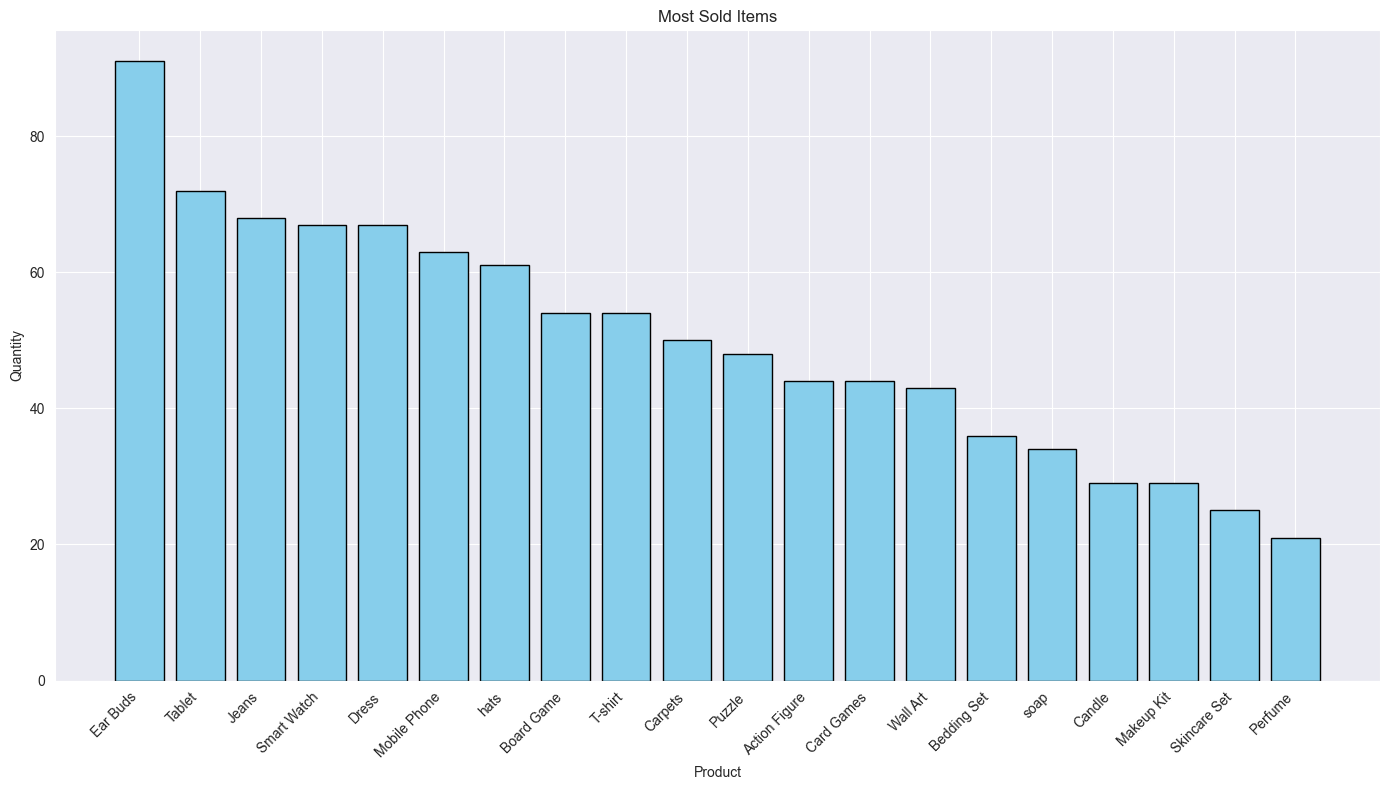

In [18]:
import matplotlib.pyplot as plt

product_counts = df['Product'].value_counts().reset_index(name='Count')
product_counts.columns = ['Product', 'Count']
product_counts = product_counts.sort_values(by='Count', ascending=False)

plt.figure(figsize=(14, 8))
plt.bar(product_counts['Product'], product_counts['Count'], color='skyblue', edgecolor='black')
plt.xlabel('Product')
plt.ylabel('Quantity')
plt.title('Most Sold Items')
plt.xticks(rotation=45, ha='right')  # Adjust rotation and alignment of xticks
plt.tight_layout()
plt.show()

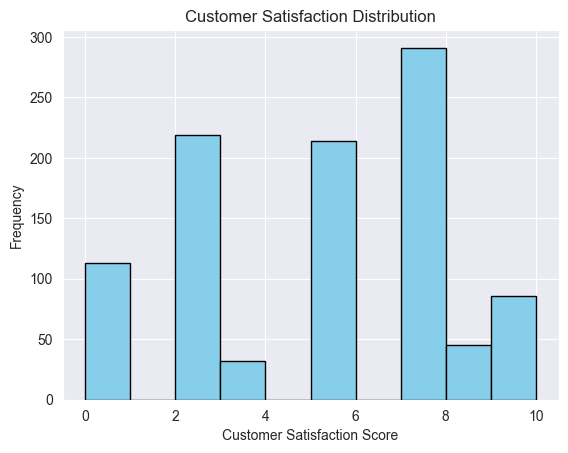

In [19]:
plt.hist(df['Customer_Satisfaction'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Customer Satisfaction Score')
plt.ylabel('Frequency')
plt.title('Customer Satisfaction Distribution')
plt.show()

In [20]:
### the most compliants 
df['Complaint_Type'].sort_values().value_counts()

Complaint_Type
Product Quality    212
Website Issue       98
Shipping            94
Name: count, dtype: int64

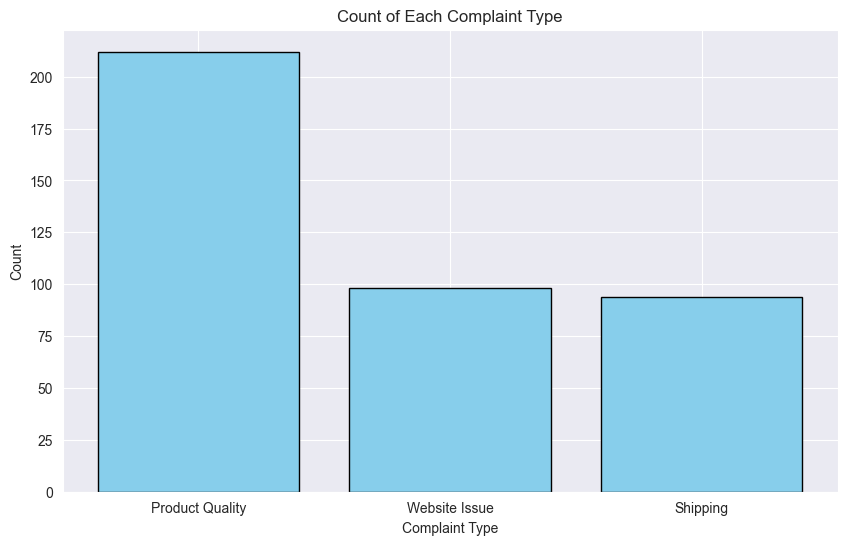

In [21]:
# Data
complaint_counts = df['Complaint_Type'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
plt.bar(complaint_counts.index, complaint_counts.values, color='skyblue', edgecolor='black')
plt.xlabel('Complaint Type')
plt.ylabel('Count')
plt.title('Count of Each Complaint Type')
plt.show()

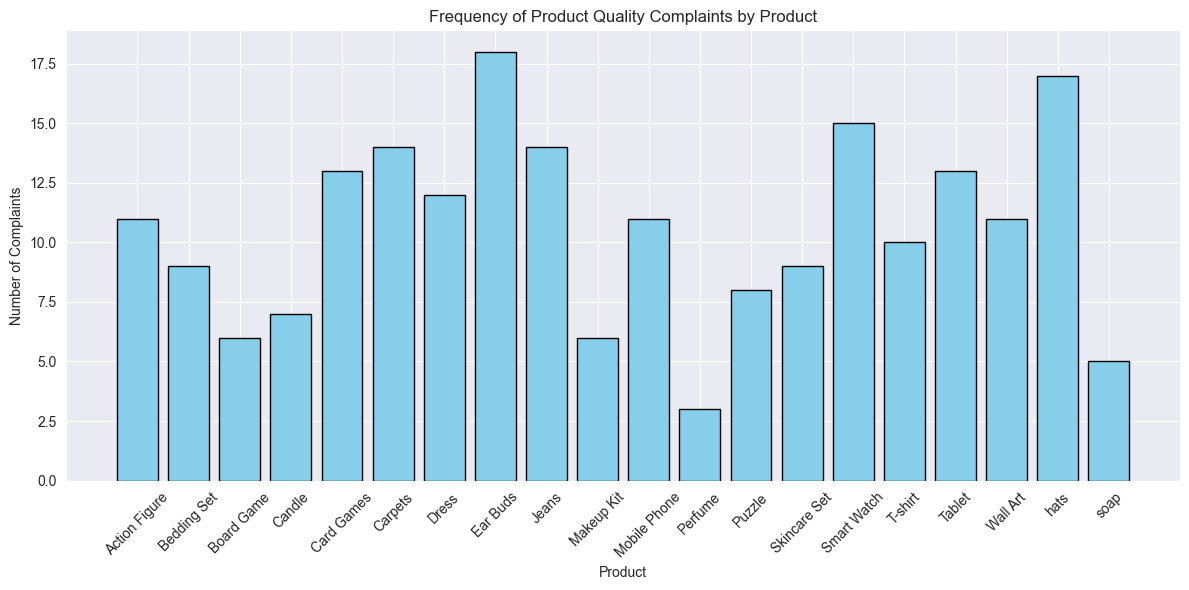

In [22]:
# Filter the data for 'product quality' complaints
product_quality_complaints = df[df['Complaint_Type'] == 'Product Quality']

# Group by Product and count occurrences
product_counts = product_quality_complaints.groupby('Product').size().reset_index(name='Counts')

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(product_counts['Product'], product_counts['Counts'],color='skyblue', edgecolor='black')
plt.xlabel('Product')
plt.ylabel('Number of Complaints')
plt.title('Frequency of Product Quality Complaints by Product')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
# Filter the data for 'product quality' complaints
product_quality_complaints = df[df['Complaint_Type'] == 'Product Quality']

# Group by Product and count occurrences
product_counts = product_quality_complaints.groupby('Product').size().reset_index(name='Counts of complaints product Qua')

# Sort the table in descending order based on the 'Counts of complaints' column
sorted_product_counts = product_counts.sort_values(by='Counts of complaints product Qua', ascending=False)

# Remove the index
sorted_product_counts = sorted_product_counts.reset_index(drop=True)

# Display the sorted table
print(sorted_product_counts)
sorted_product_counts.to_csv('sorted_product_counts.csv', index=False)


          Product  Counts of complaints product Qua
0        Ear Buds                                18
1            hats                                17
2     Smart Watch                                15
3         Carpets                                14
4           Jeans                                14
5      Card Games                                13
6          Tablet                                13
7           Dress                                12
8   Action Figure                                11
9        Wall Art                                11
10   Mobile Phone                                11
11        T-shirt                                10
12   Skincare Set                                 9
13    Bedding Set                                 9
14         Puzzle                                 8
15         Candle                                 7
16     Makeup Kit                                 6
17     Board Game                                 6
18          

In [24]:
from tabulate import tabulate

# Display the sorted table
print(tabulate(sorted_product_counts, headers='keys', tablefmt='psql'))


+----+---------------+------------------------------------+
|    | Product       |   Counts of complaints product Qua |
|----+---------------+------------------------------------|
|  0 | Ear Buds      |                                 18 |
|  1 | hats          |                                 17 |
|  2 | Smart Watch   |                                 15 |
|  3 | Carpets       |                                 14 |
|  4 | Jeans         |                                 14 |
|  5 | Card Games    |                                 13 |
|  6 | Tablet        |                                 13 |
|  7 | Dress         |                                 12 |
|  8 | Action Figure |                                 11 |
|  9 | Wall Art      |                                 11 |
| 10 | Mobile Phone  |                                 11 |
| 11 | T-shirt       |                                 10 |
| 12 | Skincare Set  |                                  9 |
| 13 | Bedding Set   |                  

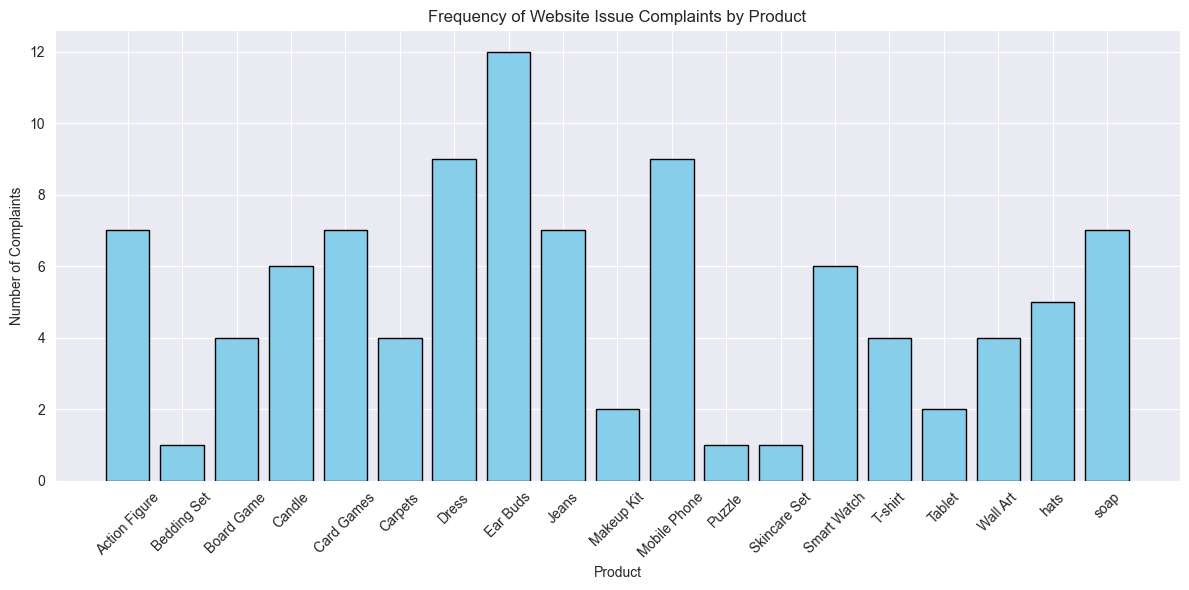

In [25]:
# Filter the data for 'Website issue' complaints
website_issue_complaints = df[df['Complaint_Type'] == 'Website Issue']

# Group by Product and count occurrences
product_counts = website_issue_complaints.groupby('Product').size().reset_index(name='Counts')

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(product_counts['Product'], product_counts['Counts'], color='skyblue', edgecolor='black')
plt.xlabel('Product')
plt.ylabel('Number of Complaints')
plt.title('Frequency of Website Issue Complaints by Product')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


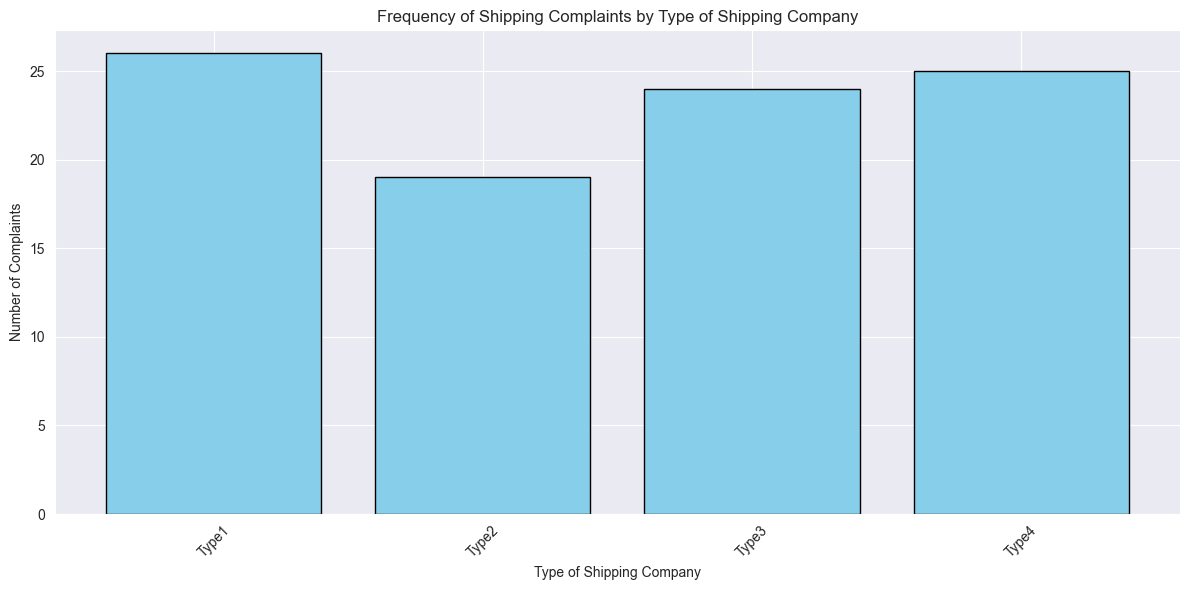

In [26]:
# Filter the data for 'Shipping' complaints
shipping_complaints = df[df['Complaint_Type'] == 'Shipping']

# Group by Type_of_Shipping_Company and count occurrences
shipping_counts = shipping_complaints.groupby('Type_of_Shipping_Company').size().reset_index(name='Counts')

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(shipping_counts['Type_of_Shipping_Company'], shipping_counts['Counts'], color='skyblue', edgecolor='black')
plt.xlabel('Type of Shipping Company')
plt.ylabel('Number of Complaints')
plt.title('Frequency of Shipping Complaints by Type of Shipping Company')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

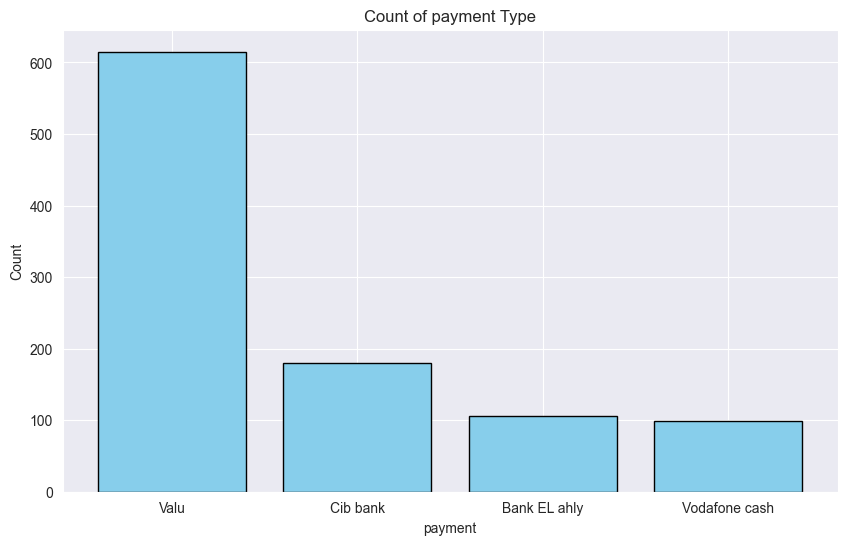

In [27]:
# Data
complaint_counts = df['Payment Method'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
plt.bar(complaint_counts.index, complaint_counts.values, color='skyblue', edgecolor='black')
plt.xlabel('payment')
plt.ylabel('Count')
plt.title('Count of payment Type')
plt.show()

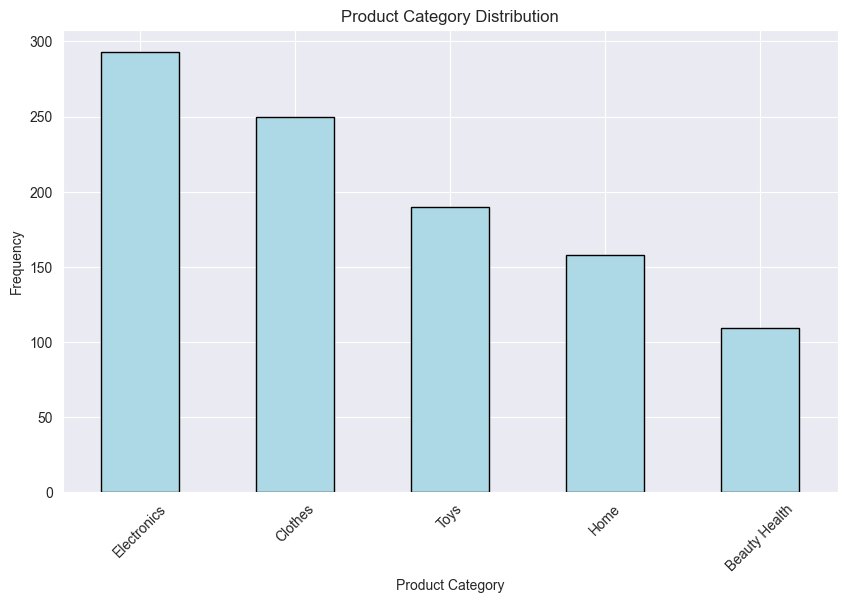

In [28]:
plt.figure(figsize=(10, 6))
df['Product_Category'].value_counts().plot(kind='bar', color='lightblue', edgecolor='black')
plt.xlabel('Product Category')
plt.ylabel('Frequency')
plt.title('Product Category Distribution')
plt.xticks(rotation=45)
plt.show()

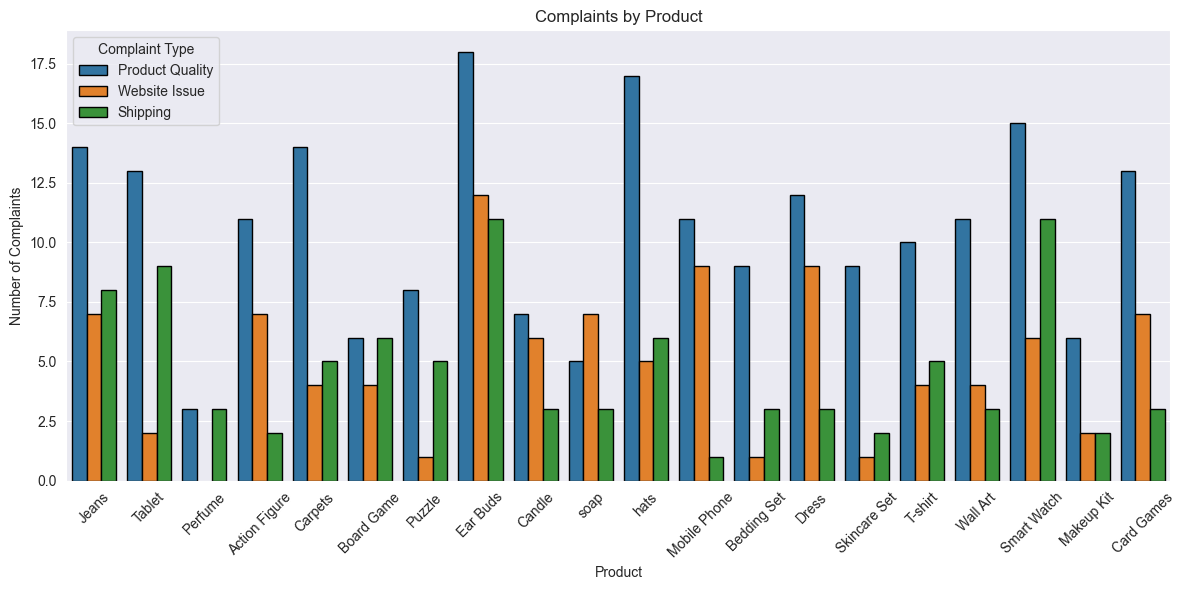

In [29]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.countplot(x='Product', hue='Complaint_Type', data=df, edgecolor='black')
plt.title('Complaints by Product')
plt.xlabel('Product')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.legend(title='Complaint Type')
plt.tight_layout()
plt.show()

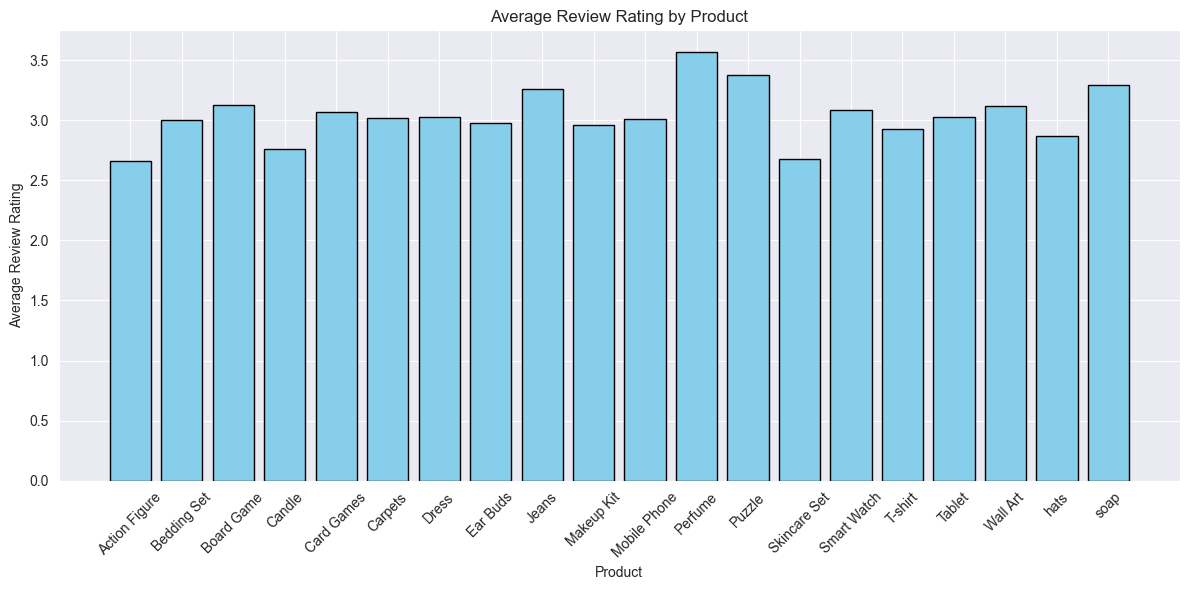

In [30]:
# Group by Product and calculate the average review rating
product_review_avg = df.groupby('Product')['Product Review'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(product_review_avg['Product'], product_review_avg['Product Review'], color='skyblue', edgecolor='black')
plt.xlabel('Product')
plt.ylabel('Average Review Rating')
plt.title('Average Review Rating by Product')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


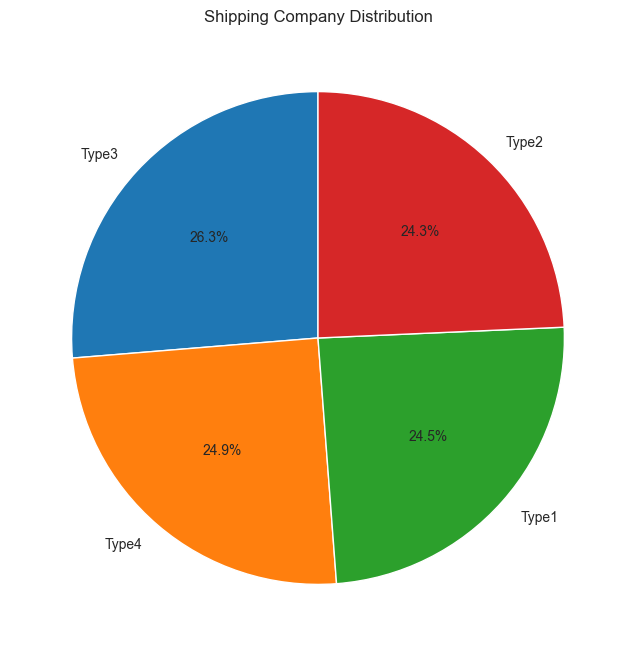

In [31]:
# Average Delivery Time
plt.figure(figsize=(8, 8))
df['Type_of_Shipping_Company'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Shipping Company Distribution')
plt.ylabel('')
plt.show()

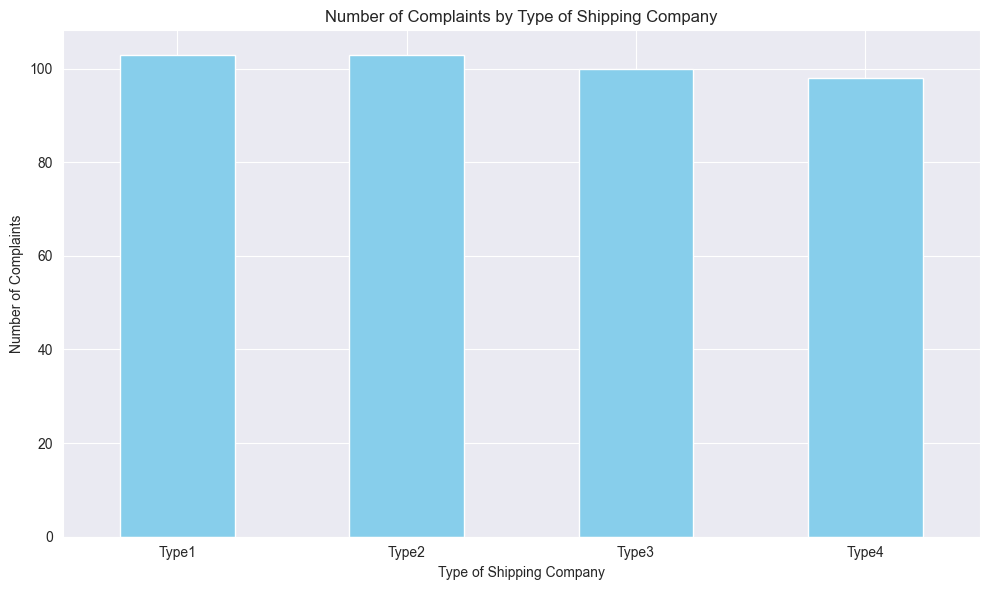

In [32]:
#  'Type_of_Shipping_Company' and 'Complaint_Type' columns
# Group by 'Type_of_Shipping_Company' and count the complaints
complaint_counts = df.groupby('Type_of_Shipping_Company')['Complaint_Type'].count()

# Plotting the complaint counts
plt.figure(figsize=(10, 6))
complaint_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Complaints by Type of Shipping Company')
plt.xlabel('Type of Shipping Company')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

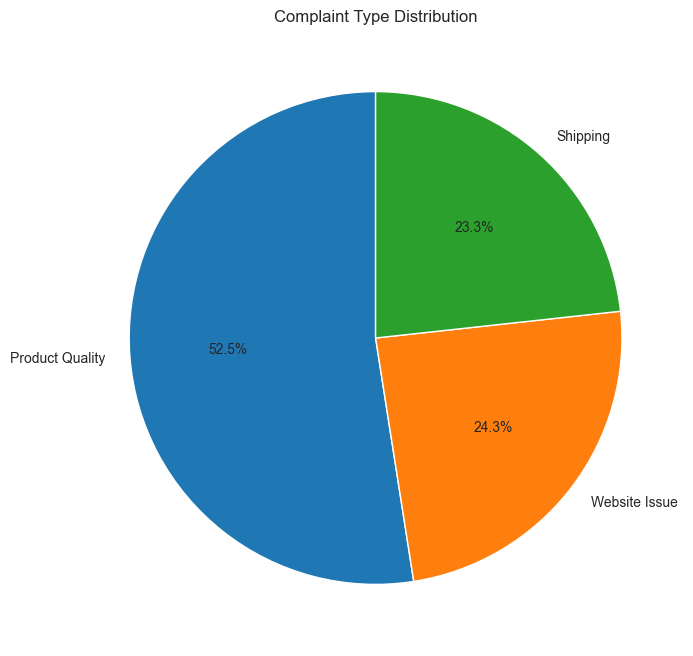

In [33]:
# Complaints by Product Category
plt.figure(figsize=(8, 8))
df['Complaint_Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Complaint Type Distribution')
plt.ylabel('')
plt.show()

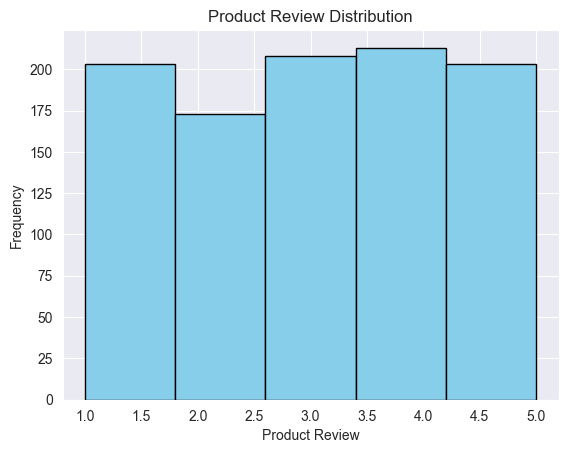

In [34]:
plt.hist(df['Product Review'], bins=5, color='skyblue', edgecolor='black')
plt.xlabel('Product Review')
plt.ylabel('Frequency')
plt.title('Product Review Distribution')
plt.show()

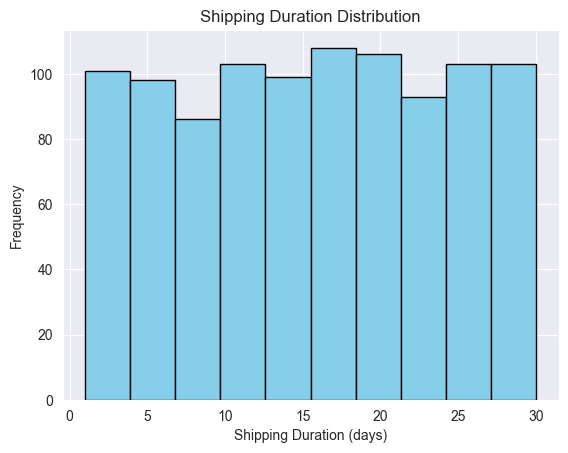

In [35]:
plt.hist(df['Shipping_Duration'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Shipping Duration (days)')
plt.ylabel('Frequency')
plt.title('Shipping Duration Distribution')
plt.show()

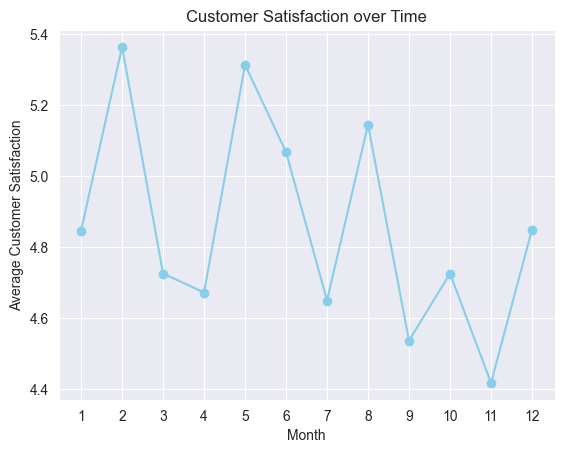

In [36]:
df['Month'] = df['Day_of_Purchase'].dt.month
monthly_satisfaction = df.groupby('Month')['Customer_Satisfaction'].mean()

plt.plot(monthly_satisfaction.index, monthly_satisfaction.values, marker='o', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Average Customer Satisfaction')
plt.title('Customer Satisfaction over Time')
plt.xticks(monthly_satisfaction.index)
plt.show()  

In [37]:
# Get the most common governorate
most_common_governorate = df['Governorate'].value_counts().idxmax()

# Get the count of customers in the most common governorate
most_common_count = df['Governorate'].value_counts().max()

print(f"The most common governorate is {most_common_governorate} with {most_common_count} customers.")


The most common governorate is Cairo with 193 customers.


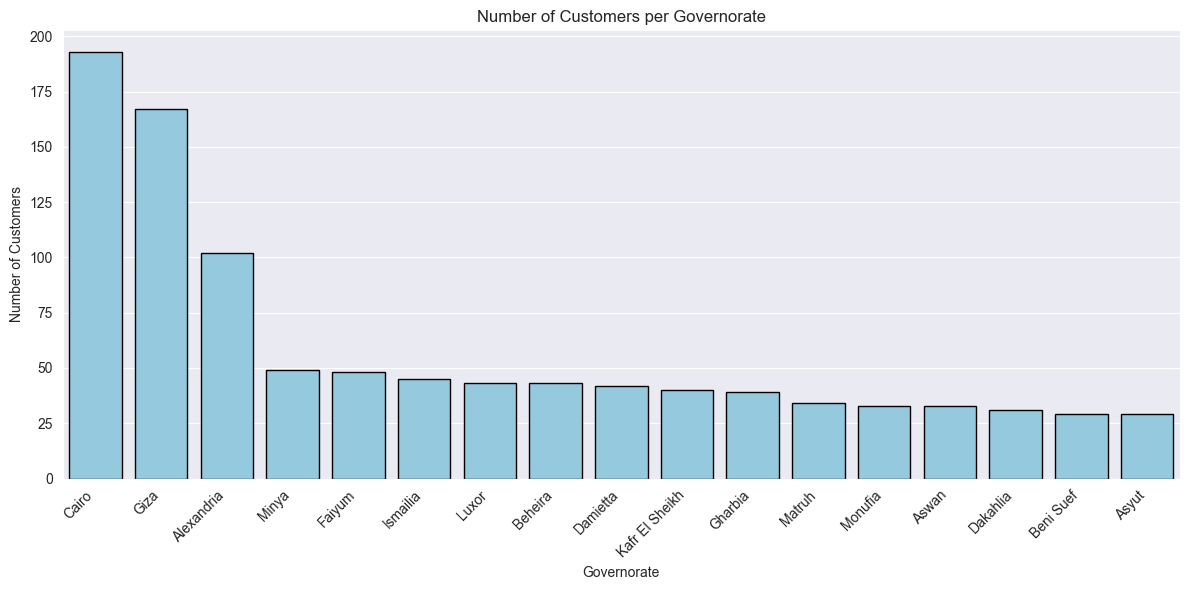

In [38]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Governorate', data=df, order=df['Governorate'].value_counts().index,color='skyblue', edgecolor='black')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Governorate')
plt.ylabel('Number of Customers')
plt.title('Number of Customers per Governorate')
plt.tight_layout()
plt.show()

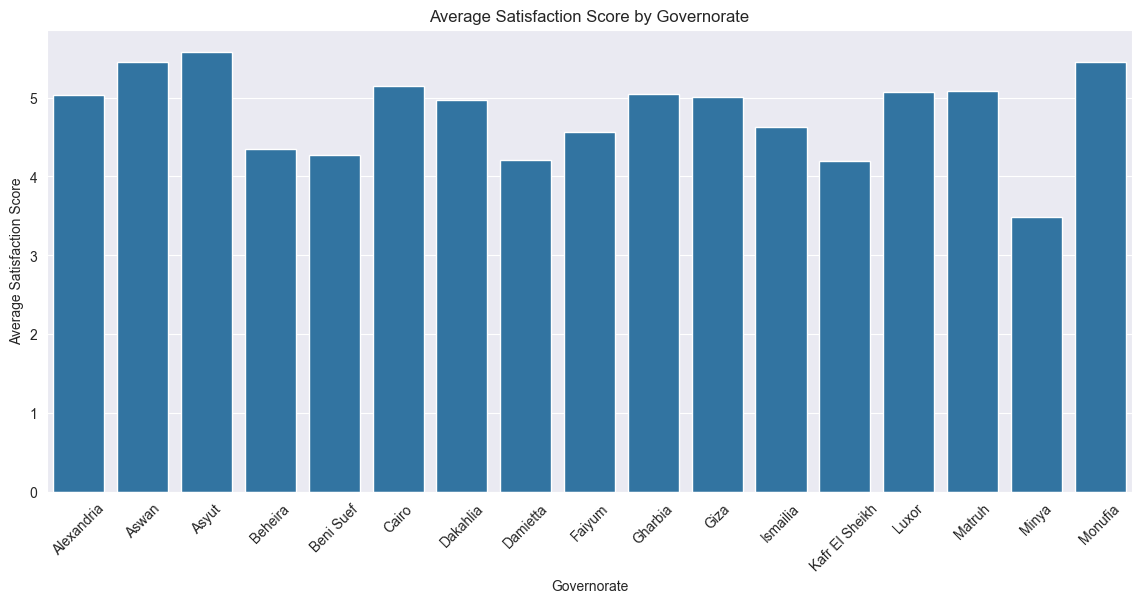

In [39]:
avg_satisfaction_by_governorate = df.groupby('Governorate')['Customer_Satisfaction'].mean()
avg_purchase_frequency_by_governorate = df.groupby('Governorate')['Customer_ID'].count() / df['Customer_ID'].nunique()

# Visualization
plt.figure(figsize=(14, 6))
sns.barplot(x=avg_satisfaction_by_governorate.index, y=avg_satisfaction_by_governorate.values)
plt.xlabel('Governorate')
plt.ylabel('Average Satisfaction Score')
plt.title('Average Satisfaction Score by Governorate')
plt.xticks(rotation=45)
plt.show()

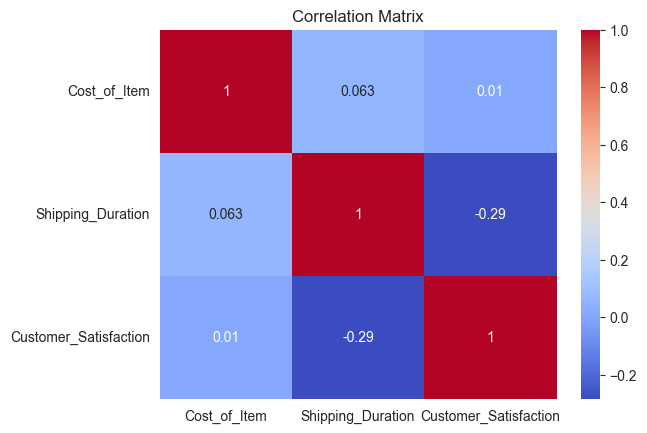

In [40]:
corr_matrix = df[['Cost_of_Item', 'Shipping_Duration', 'Customer_Satisfaction']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Machine learning

In [41]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


# Calculate RFM metrics
current_date = max(df['Day_of_Receiving'])
rfm_df = df.groupby('Customer_ID').agg({
    'Day_of_Purchase': lambda x: (current_date - x.max()).days,  # Recency
    'Customer_ID': 'count',  # Frequency
    'Cost_of_Item': 'sum',  # Monetary
    'Quantity': 'sum',  # Sum of quantities
    'Customer_Profit': 'sum',  # Sum of customer profits
    'Total_Profit_BY_Cust': 'sum',  # Sum of total profits by customer
    'Customer_Satisfaction': 'mean'  # Average customer satisfaction
})
rfm_df.columns = ['Recency', 'Frequency', 'Monetary', 'Quantity', 'Customer_Profit', 'Total_Profit_BY_Cust', 'Customer_Satisfaction']
rfm_df.reset_index(inplace=True)  # Reset the index to keep 'Customer_ID' as a column

# Standardize the RFM metrics
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df[['Recency', 'Frequency', 'Monetary', 'Quantity', 'Customer_Profit', 'Total_Profit_BY_Cust', 'Customer_Satisfaction']])

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(rfm_scaled)
cluster_labels = kmeans.labels_

# Add the cluster labels to the RFM DataFrame
rfm_df['Cluster'] = cluster_labels

# Analyze the clusters
cluster_analysis = rfm_df.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'Quantity': 'mean',
    'Customer_Profit': 'mean',
    'Total_Profit_BY_Cust': 'mean',
    'Customer_Satisfaction': 'mean',
    'Customer_ID': 'count'
}).reset_index()

print(cluster_analysis)
cluster_analysis.to_csv('cluster_analysis.csv', index=False)



   Cluster     Recency  Frequency    Monetary   Quantity  Customer_Profit  \
0        0  113.117647   2.039216  654.509804  10.803922        50.980392   
1        1  211.907303   1.000000  213.651685   7.182584        19.269663   
2        2  212.816712   1.000000  200.862534   2.722372        18.436658   
3        3  199.142012   1.000000  816.568047   5.733728        50.828402   

   Total_Profit_BY_Cust  Customer_Satisfaction  Customer_ID  
0            269.803922               4.627451           51  
1            137.668539               4.778090          356  
2             47.762803               4.840970          371  
3            290.000000               5.207101          169  


In [42]:
# Create a DataFrame with Customer_ID and Cluster
customer_cluster_df = rfm_df[['Customer_ID', 'Cluster']]

# Display the DataFrame
print(customer_cluster_df)
customer_cluster_df.to_csv('customer_cluster.csv', index=False)

     Customer_ID  Cluster
0           1004        2
1           1005        1
2           1009        0
3           1055        3
4           1064        2
..           ...      ...
942         9945        2
943         9958        1
944         9967        2
945         9989        3
946         9996        2

[947 rows x 2 columns]


In [43]:
cluster_analysis.to_csv('cluster_analysis.csv', index=False)


In [44]:
df['Satisfaction_Level'] = (df['Customer_Satisfaction'] > 4).astype(int)
df['Satisfaction_Level'].sort_values().value_counts()

Satisfaction_Level
1    636
0    364
Name: count, dtype: int64

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

#
df2 = df.copy()

# Initialize LabelEncoder
le = LabelEncoder()

# Encode categorical variables in df2
df2['Complaint_Type'] = le.fit_transform(df2['Complaint_Type'])
df2['Product_Category'] = le.fit_transform(df2['Product_Category'])
df2['Product'] = le.fit_transform(df2['Product'])
df2['Payment Method'] = le.fit_transform(df2['Payment Method'])
df2['Governorate'] = le.fit_transform(df2['Governorate'])


# Splitting the data into training and testing sets
X = df2[['Cost_of_Item', 'Shipping_Duration', 'Complaint_Type', 'Product_Category', 'Product Review', 'Payment Method', 'Quantity', 'Total_Profit_BY_Cust']]
y = df2['Satisfaction_Level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Model training
rf = RandomForestClassifier()
rf.fit(scaled_X_train, y_train)

# Model evaluation
y_pred = rf.predict(scaled_X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [46]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(scaled_X_train, y_train)

# Model evaluation
y_pred = lr.predict(scaled_X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.93


In [47]:
#predict
predict=lr.predict(scaled_X_test)
# confusion matrix 
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test,predict),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])

,Predicted No,Predicted Yes
Actual No,66,8
Actual Yes,6,120


In [48]:
x=pd.DataFrame(confusion_matrix(y_test,predict),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])

x.to_csv('confussion matrix.csv', index=False)


In [49]:
def stat(customerdata, rf):
    predictions = rf.predict(customerdata.reshape(1, -1))
    if predictions == 1:
        return 'won\'t be satisfied'
    else:
        return 'Is satisfied'

customerdata = np.array([800, 2, 4, 2, 5,0,10,200])
## This array represents a customer who purchased an item with a cost of 800, had a shipping duration of 1, made a complaint of type 1, purchased a product in category 2, specific product 1, provided a product review of 1, used payment method 0, resides in governorate 1, purchased a quantity of 3 items, and had a customer profit of 1 and a total profit by customer of 5.
# replaceing cv_classifier with  actual trained KNN model
print('This customer {} according to RF model.'.format(stat(customerdata, rf)))

This customer won't be satisfied according to RF model.


In [50]:
df.columns

Index(['Customer_ID', 'Cost_of_Item', 'Day_of_Purchase', 'Day_of_Receiving',
       'Day_of_ReTurn', 'Type_of_Shipping_Company', 'Complaint_Type',
       'Product_Category', 'Product', 'Shipping_Duration', 'Product Review',
       'Payment Method', 'Governorate', 'Quantity', 'Customer_Profit',
       'Total_Profit_BY_Cust', 'Customer_Satisfaction', 'Month',
       'Satisfaction_Level'],
      dtype='object')

In [51]:
### Reccomendation system by the product
from sklearn.metrics.pairwise import cosine_similarity

# Create a product-customer matrix
product_customer_matrix = df.pivot_table(index='Customer_ID', columns='Product', values='Cost_of_Item', fill_value=0)

# Calculate cosine similarity between products
product_similarity = cosine_similarity(product_customer_matrix.T)

# Create a dictionary of product indices
product_indices = {product: idx for idx, product in enumerate(product_customer_matrix.columns)}

# Function to get product recommendations
def get_product_recommendations(product_name, num_recommendations=3):
    product_idx = product_indices[product_name]
    similar_products = sorted(list(enumerate(product_similarity[product_idx])), key=lambda x: x[1], reverse=True)
    recommendations = []
    for idx, sim in similar_products:
        if product_customer_matrix.columns[idx] != product_name and product_customer_matrix.iloc[:, idx].sum() > 0:
            recommendations.append(product_customer_matrix.columns[idx])
            if len(recommendations) >= num_recommendations:
                break
    return recommendations

# Example: Get recommendations for a product
product_name = 'Tablet'  # Change this to any product in the dataset
recommendations = get_product_recommendations(product_name)
print(f"Recommendations for {product_name}: {recommendations}")

Recommendations for Tablet: ['Skincare Set', 'Makeup Kit', 'Puzzle']


In [52]:
df['Product_Category']

0            Clothes
1        Electronics
2      Beauty Health
3               Toys
4        Electronics
           ...      
995             Toys
996             Toys
997             Toys
998          Clothes
999      Electronics
Name: Product_Category, Length: 1000, dtype: object

In [53]:
# Function to get customer recommendations
def get_customer_recommendations(Customer_ID, num_recommendations=4):
    # Check if customer_id exists in the dataset
    if Customer_ID not in product_customer_matrix.index:
        return f"Customer ID '{Customer_ID}' not found in the dataset."

    # Find products bought by the customer
    customer_products = product_customer_matrix.loc[Customer_ID]
    bought_products = customer_products[customer_products > 0].index.tolist()

    # Calculate similarity of these products to all other products
    similar_products = []
    for product in bought_products:
        product_idx = product_indices[product]
        similar_products += sorted(list(enumerate(product_similarity[product_idx])), key=lambda x: x[1], reverse=True)

    # Get recommendations
    recommendations = []
    for idx, sim in similar_products:
        if product_customer_matrix.columns[idx] not in bought_products and product_customer_matrix.iloc[:, idx].sum() > 0:
            recommendations.append(product_customer_matrix.columns[idx])
            if len(recommendations) >= num_recommendations:
                break

    # Check if recommendations list is empty
    if not recommendations:
        return f"No product recommendations found for customer ID '{Customer_ID}'."

    return recommendations


In [54]:
Customer_ID = 7949  # Change this to any customer id
recommendations = get_customer_recommendations(Customer_ID)
print(f"Product recommendations for customer ID {Customer_ID}: {recommendations}")


Product recommendations for customer ID 7949: ['hats', 'Mobile Phone', 'Action Figure', 'Bedding Set']


In [55]:
df[df['Customer_ID'] == 7949]

,Customer_ID,Cost_of_Item,Day_of_Purchase,Day_of_Receiving,Day_of_ReTurn,Type_of_Shipping_Company,Complaint_Type,Product_Category,Product,Shipping_Duration,Product Review,Payment Method,Governorate,Quantity,Customer_Profit,Total_Profit_BY_Cust,Customer_Satisfaction,Month,Satisfaction_Level
12,7949,250,2024-04-05,2024-05-05,NaT,Type1,Product Quality,Home,Candle,30,3,Valu,Giza,9,20,180,0,4,0
654,7949,500,2024-06-04,2024-06-16,NaT,Type4,None,Electronics,Ear Buds,12,3,Valu,Alexandria,6,30,180,7,6,1
742,7949,500,2024-05-13,2024-05-24,NaT,Type4,None,Electronics,Ear Buds,11,5,Cib bank,Kafr El Sheikh,4,30,120,10,5,1


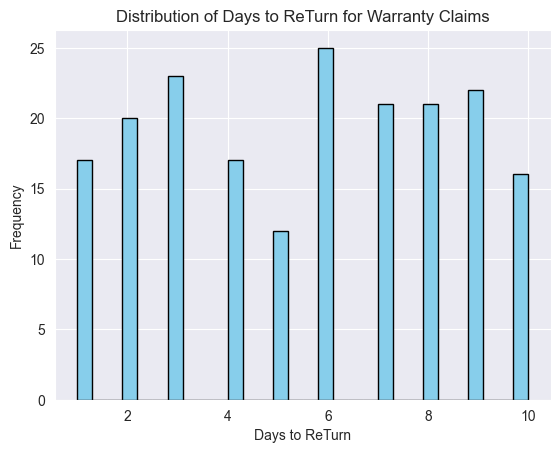

In [56]:
df['Day_of_ReTurn'] = pd.to_datetime(df['Day_of_ReTurn'])

# Calculate the time elapsed between purchase and return for warranty
df['Day_of_ReTurn'] = (df['Day_of_ReTurn'] - df['Day_of_Receiving']).dt.days

# Perform warranty analysis based on the Days_to_return variable

plt.hist(df['Day_of_ReTurn'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Days to ReTurn')
plt.ylabel('Frequency')
plt.title('Distribution of Days to ReTurn for Warranty Claims')
plt.show()

In [57]:
# Group the data by 'Product' and count the return
return_counts = df.groupby('Product')['Day_of_ReTurn'].count()

# Find the product with the highest return count
product_with_highest_return = return_counts.idxmax()
highest_return_count = return_counts.max()

print(f"The product with the highest return count is '{product_with_highest_return}' with {highest_return_count} returns.")


The product with the highest return count is 'Ear Buds' with 20 returns.


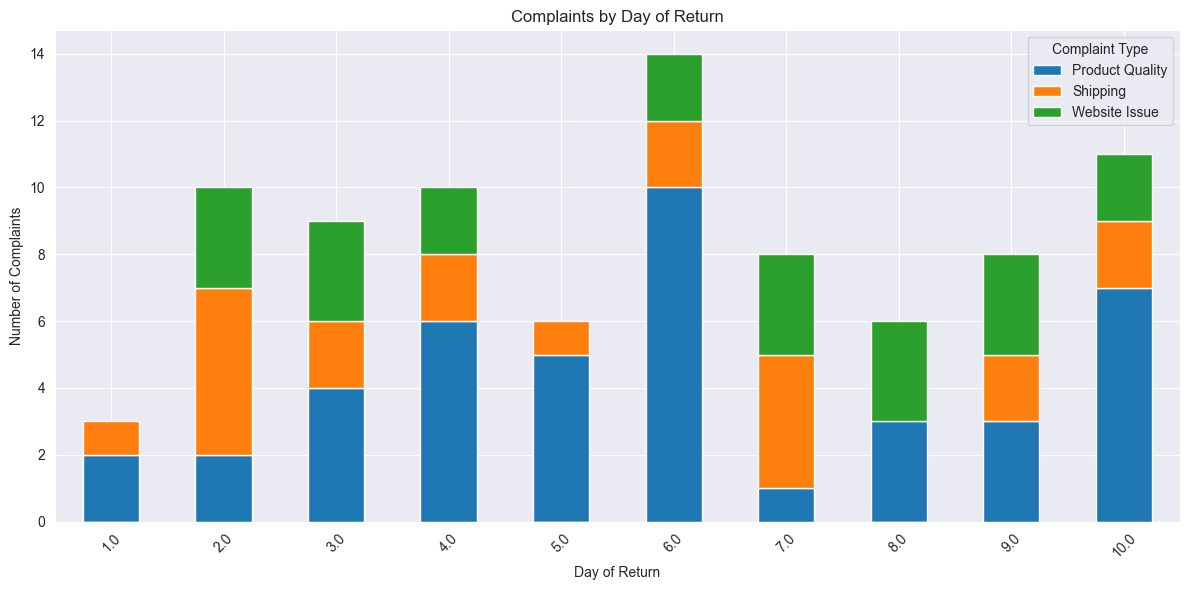

In [58]:
# Filter the data for returns
returns = df[df['Day_of_ReTurn'].notnull()]

# Group by Day_of_Return and Complaint_Type and count occurrences
complaint_counts = returns.groupby(['Day_of_ReTurn', 'Complaint_Type']).size().unstack(fill_value=0)

# Plotting
complaint_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Day of Return')
plt.ylabel('Number of Complaints')
plt.title('Complaints by Day of Return')
plt.legend(title='Complaint Type', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [59]:
# Filter the DataFrame for the product with the highest return count
product_df = df[df['Product'] == product_with_highest_return]

# Count the number of complaints for this product
complaint_count = product_df['Complaint_Type'].count()

print(f"The product '{product_with_highest_return}' received the most complaints with a total of {complaint_count} complaints.")


The product 'Ear Buds' received the most complaints with a total of 41 complaints.


In [60]:
# Filter the DataFrame for the product with the highest complaint count
product_df = df[df['Product'] == product_with_highest_return]

# Count the occurrences of each complaint type
complaint_type_counts = product_df['Complaint_Type'].value_counts()

# Print the complaint types
print("Complaint types for the Jeans with the highest complaint count:")
for complaint_type, count in complaint_type_counts.items():
    print(f"{complaint_type}: {count}")

Complaint types for the Jeans with the highest complaint count:
Product Quality: 18
Website Issue: 12
Shipping: 11


In [61]:
# Group the data by 'Product' and count the complaints
complaint_counts = df.groupby('Product')['Complaint_Type'].count()

# Find the product with the highest complaint count
product_with_highest_complaints = complaint_counts.idxmax()
highest_complaint_count = complaint_counts.max()

print(f"The product with the highest complaint count is '{product_with_highest_complaints}' with {highest_complaint_count} complaints.")



The product with the highest complaint count is 'Ear Buds' with 41 complaints.


In [62]:
# Filter the DataFrame for the product with the highest complaint count
product_df = df[df['Product'] == product_with_highest_complaints]

# Count the occurrences of each complaint type
complaint_type_counts = product_df['Complaint_Type'].value_counts()

# Print the complaint types
print("Complaint types for the mobile phone with the highest complaint count:")
for complaint_type, count in complaint_type_counts.items():
    print(f"{complaint_type}: {count}")

Complaint types for the mobile phone with the highest complaint count:
Product Quality: 18
Website Issue: 12
Shipping: 11


In [63]:
# Filter the DataFrame for the product with the highest complaint count
product_df = df[df['Product'] == product_with_highest_complaints]

# Count the occurrences of each complaint type
complaint_type_counts = product_df['Complaint_Type'].value_counts()

# Print the complaint types
print("Complaint types for the mobile phone with the highest complaint count:")
for complaint_type, count in complaint_type_counts.items():
    print(f"{complaint_type}: {count}") 

Complaint types for the mobile phone with the highest complaint count:
Product Quality: 18
Website Issue: 12
Shipping: 11


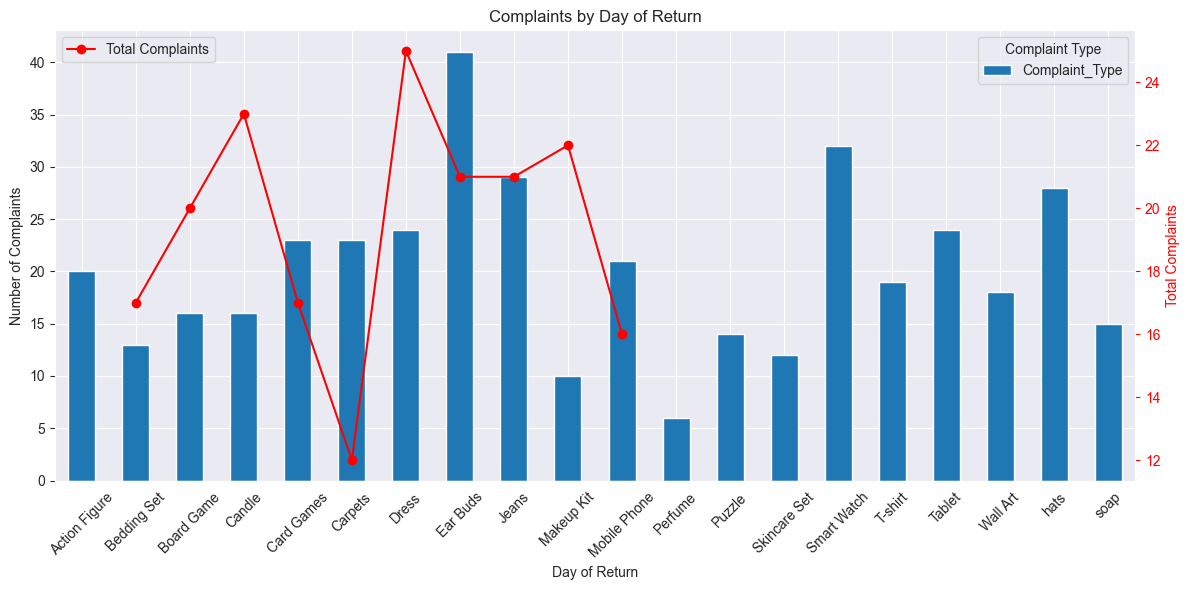

In [64]:
# Group by Day_of_Return and sum the total number of complaints
total_complaints = returns.groupby('Day_of_ReTurn').size()

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Stacked bar plot
complaint_counts.plot(kind='bar', stacked=True, ax=ax1)
ax1.set_xlabel('Day of Return')
ax1.set_ylabel('Number of Complaints')
ax1.set_title('Complaints by Day of Return')
ax1.legend(title='Complaint Type', bbox_to_anchor=(1, 1))
ax1.tick_params(axis='x', rotation=45)

# Line plot for total complaints
ax2 = ax1.twinx()
ax2.plot(total_complaints.index, total_complaints.values, color='red', marker='o', label='Total Complaints')
ax2.set_ylabel('Total Complaints', color='red')
ax2.tick_params(axis='y', colors='red')
ax2.grid(False)
ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()


In [65]:
# Group by Day_of_Referral and Complaint_Type, then count occurrences
complaint_counts = df.groupby(['Day_of_ReTurn', 'Complaint_Type']).size().reset_index(name='Counts')

# Find the most common complaint type for each day of referral
most_common_complaint = complaint_counts.loc[complaint_counts.groupby('Day_of_ReTurn')['Counts'].idxmax()]

# Display the most common complaint type for each day of referral
print(most_common_complaint)


    Day_of_ReTurn   Complaint_Type  Counts
0             1.0  Product Quality       2
3             2.0         Shipping       5
5             3.0  Product Quality       4
8             4.0  Product Quality       6
11            5.0  Product Quality       5
13            6.0  Product Quality      10
17            7.0         Shipping       4
19            8.0  Product Quality       3
21            9.0  Product Quality       3
24           10.0  Product Quality       7


In [66]:
# Sort the DataFrame in descending order based on 'Total Counts'
complaint_type_counts_sum_sorted = complaint_type_counts_sum.sort_values(by='Total Counts', ascending=False)

# Display the sorted DataFrame
print(complaint_type_counts_sum_sorted)


NameError: name 'complaint_type_counts_sum' is not defined

In [ ]:
df['Customer_ID'].value_counts()